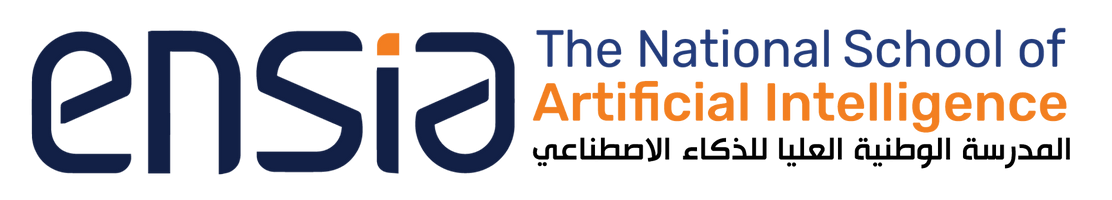

# 1-Data Preprocessing:
## 1-1- Import the data + Data separation into Feaures and Target variable:

In [34]:
# Load the necessary library
library(readr)

# Load the CSV file
file_path <- 'Sleep Train 5000.csv'
df <- read_csv(file_path, col_names = FALSE)  # no column names

# Target variable (first column with labels 0 to 4)
y <- df[[1]]

# Features (all columns except the first)
X <- df[ , -1]


Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.


## 1-2-Data Shape

In [35]:
# Display basic info
cat("Shape of the dataset:\n")
dim(df)

Shape of the dataset:


[1] 4999  179

In [36]:
# Print first 5 rows
cat("\nFirst 5 rows:\n")
head(df, 5)



First 5 rows:


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179
0,-1.608303,-13.170696,-8.997802,1.347497,5.259585,-1.521367,2.651526,4.6510377,3.781685,...,-8.041514,-6.5636144,-4.998779,-5.346520,-6.389744,-11.171185,-2.390720,1.086691,6.911355,6.1289377
0,-2.825397,2.390720,3.955555,-4.216361,2.477656,2.129914,3.955555,-5.1726494,5.694261,...,4.129426,7.0852260,-2.390720,-2.303785,-3.694750,4.564103,-6.215873,-2.738462,-4.477167,-4.3902320
0,-15.952625,-3.347008,-15.517949,-9.432479,-16.474237,-6.650549,-14.909402,-12.2144080,-10.823443,...,-4.390232,-0.7389499,4.477167,12.996825,21.951160,21.081806,21.603418,14.909402,9.345543,6.9982905
0,-26.558731,-18.560684,-12.040537,-4.216361,-9.432479,1.260562,-2.216850,-3.5208790,-5.781197,...,-3.086203,-0.6520147,3.607814,15.170208,16.039560,6.128938,3.955555,-1.956044,-2.390720,-4.6510377
0,-5.607326,6.042003,-4.129426,-5.172649,-7.172161,-11.953602,-7.780708,-0.1304029,-2.912332,...,-1.260562,1.6083028,4.564103,-4.911844,10.301831,10.127961,8.389256,-2.216850,-4.390232,0.4781441


## 1-3-Missing Data

In [37]:
# Check for missing values
missing <- colSums(is.na(df))

# Show only columns with missing values
cat("\nColumns with missing values:\n")
print(missing[missing > 0])



Columns with missing values:
named numeric(0)


RESULTS SHOWS THAT THERE IS NO missing values

## 1-4- Summary statistics for all variables

In [38]:
# Set display options to avoid truncation
options(width = 200)

# Summary statistics for all variables
summary_stats <- summary(df)

# Transpose the summary for better readability
summary_stats_t <- t(summary_stats)

# Display the summary statistics
print(summary_stats_t)


                                                                                                                                       
      X1  Min.   :0.000        1st Qu.:2.000        Median :2.000        Mean   :2.165        3rd Qu.:3.000        Max.   :4.000       
      X2  Min.   :-146.0948    1st Qu.:  -9.3455    Median :  -0.3912    Mean   :  -0.5546    3rd Qu.:   8.0622    Max.   : 105.4090   
      X3  Min.   :-82.3712     1st Qu.: -9.2586     Median : -0.6520     Mean   : -0.5642     3rd Qu.:  8.0415     Max.   : 95.5854    
      X4  Min.   :-81.8496     1st Qu.: -9.5194     Median : -0.6520     Mean   : -0.5402     3rd Qu.:  8.2154     Max.   : 91.9341    
      X5  Min.   :-90.5431     1st Qu.: -9.6933     Median : -0.7389     Mean   : -0.6494     3rd Qu.:  8.2154     Max.   :109.6689    
      X6  Min.   :-90.8039     1st Qu.: -9.4325     Median : -0.7389     Mean   : -0.7537     3rd Qu.:  7.8839     Max.   : 87.0657    
      X7  Min.   :-103.4095    1st Qu.:  -9.6933

## 1-5- Feature Distribution Visualization

In [39]:
# Run only if not installed
# install.packages("./gridExtra_*.tar.gz", repos = NULL, type = "source")

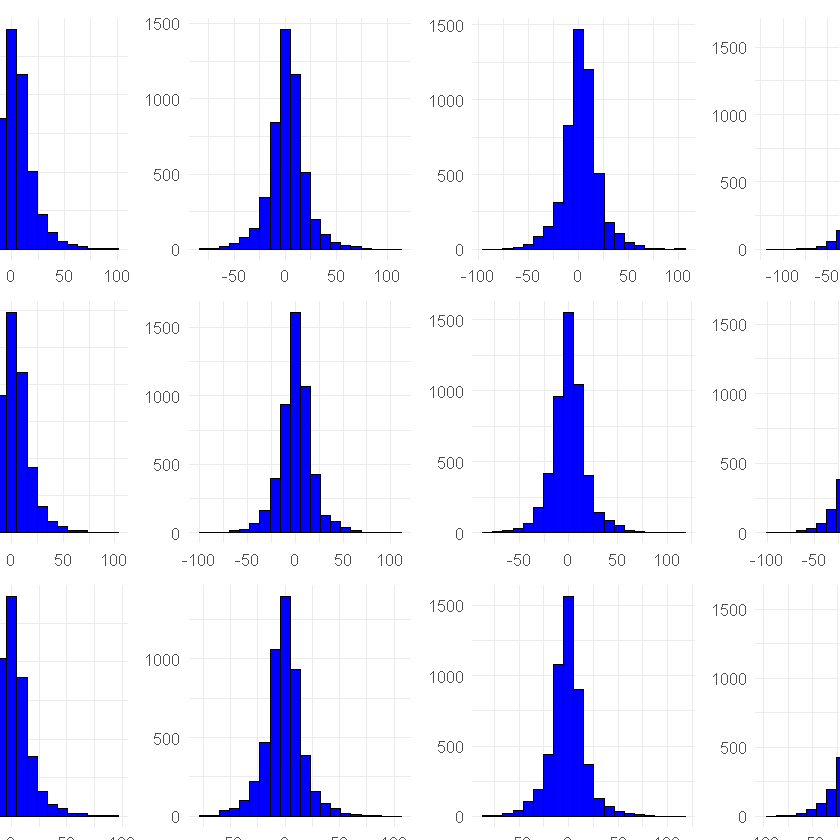

In [40]:
# Load necessary libraries
library(ggplot2)
library(gridExtra)
library(grid)

# Assuming df is a data frame
numerical <- sapply(df, is.numeric)  # Select numeric columns
numerical_columns <- names(df)[numerical]

# Define the number of columns you want
num_columns <- 14  # 14 columns for a more manageable grid

# Calculate the number of rows needed
num_rows <- ceiling(length(numerical_columns) / num_columns)

# Create the histogram plots
plots <- lapply(numerical_columns, function(col) {
  ggplot(df, aes_string(x = col)) +
    geom_histogram(bins = 20, fill = "blue", color = "black") +
    theme_minimal() +
    theme(axis.text.x = element_text(size = 10),
          axis.text.y = element_text(size = 10),
          axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          plot.margin = margin(5, 5, 5, 5))  # Reduce margins to fit more histograms
})

# Create the layout
combined_plot <- grid.arrange(grobs = plots, ncol = num_columns, nrow = num_rows, 
                              heights = unit(rep(6, num_rows), "cm"),  # Adjust height for each row
                              widths = unit(rep(6, num_columns), "cm"),
                              top = textGrob("Histograms", gp = gpar(fontsize = 14)))

# Save the grid as a PNG image with larger size
ggsave("histograms_from_R_notebook.png", combined_plot, width = 36, height = 30, dpi = 300)


## 1-6- Mean, Min, and Max Trends Across Features

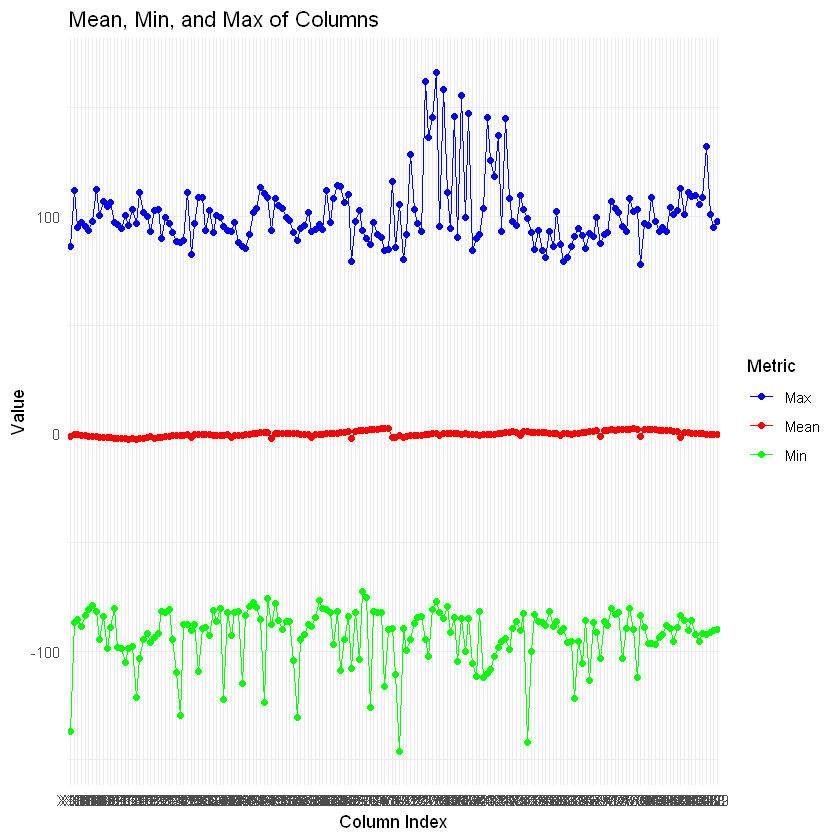

In [41]:

# Determine which columns are numeric
numerical <- sapply(X, is.numeric)

# Calculate mean, min, and max for each numeric column
mean_values <- colMeans(X[, numerical], na.rm = TRUE)
min_values <- apply(X[, numerical], 2, min, na.rm = TRUE)
max_values <- apply(X[, numerical], 2, max, na.rm = TRUE)

# Convert to data frame for plotting
summary_df <- data.frame(
  Column = rep(names(mean_values), 3),
  Value = c(mean_values, min_values, max_values),
  Metric = rep(c("Mean", "Min", "Max"), each = length(mean_values))
)

# Plot the values
library(ggplot2)
ggplot(summary_df, aes(x = Column, y = Value, color = Metric, group = Metric)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Mean, Min, and Max of Columns",
    x = "Column Index",
    y = "Value"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_color_manual(values = c("blue", "red", "green")) +
  theme_minimal()

### Better Mean Trend Visualization 

geom_path: Each group consists of only one observation. Do you need to adjust the group aesthetic?


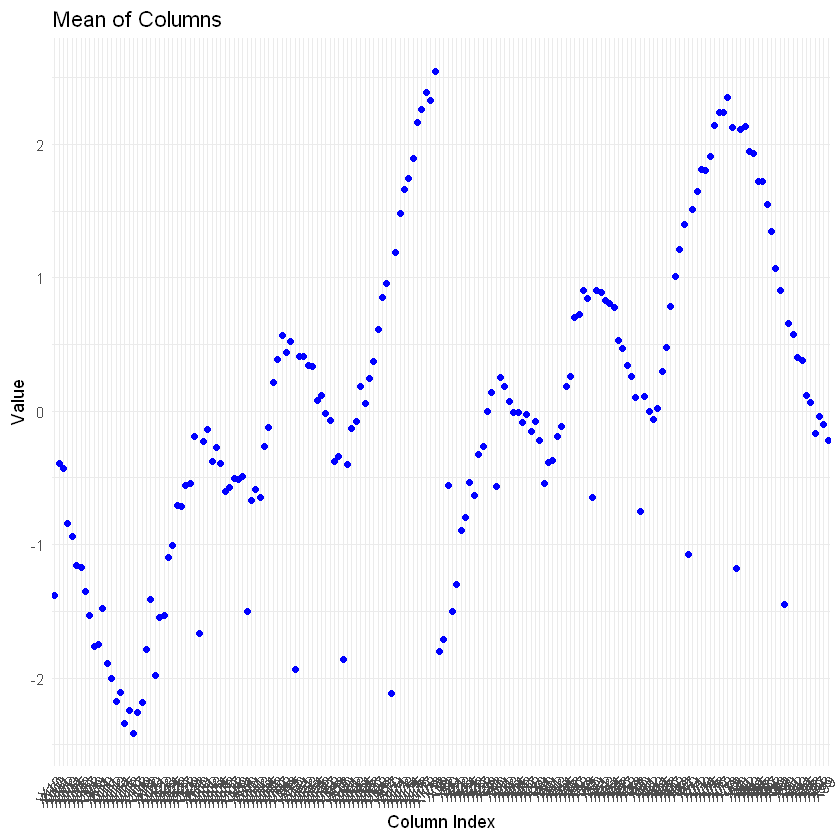

In [43]:
# Plotting mean alone
library(ggplot2)

# Create a data frame for mean values (assuming 'mean_values' is available)
mean_df <- data.frame(
  Column = names(mean_values),
  Value = mean_values
)

# Plot using ggplot2
ggplot(mean_df, aes(x = Column, y = Value)) +
  geom_line(color = "blue") +
  geom_point(color = "blue") +
  labs(
    title = "Mean of Columns",
    x = "Column Index",
    y = "Value"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
